In [1]:
import numpy as np
import pandas as pd
import datetime

# Generate timestamps for the data (assuming hourly intervals for one month)
start_date = datetime.datetime(2024, 1, 1)
end_date = datetime.datetime(2024, 2, 1)
timestamps = pd.date_range(start=start_date, end=end_date, freq='H')

# Generate synthetic sensor data
num_samples = len(timestamps)
mean_vibration = 0.5
std_dev_vibration = 0.1
vibration_data = np.random.normal(mean_vibration, std_dev_vibration, num_samples)

mean_moisture = 40
std_dev_moisture = 5
moisture_data = np.random.normal(mean_moisture, std_dev_moisture, num_samples)

mean_temperature = 70
std_dev_temperature = 5
temperature_data = np.random.normal(mean_temperature, std_dev_temperature, num_samples)

# Define failure threshold
temperature_threshold = 80
vibration_threshold = 0.6

# Add failure labels and error types based on conditions
failure_label = []
error_type = []
for temp, vib in zip(temperature_data, vibration_data):
    if temp > temperature_threshold:
        failure_label.append(1)  # Failure occurred
        error_type.append('High Temperature')
    elif vib > vibration_threshold:
        failure_label.append(1)  # Failure occurred
        error_type.append('High Vibration')
    else:
        failure_label.append(0)  # No failure
        error_type.append('None')

# Create a DataFrame to store the sensor data with failure labels and error types
sensor_data = pd.DataFrame({
    'Timestamp': timestamps,
    'Vibration': vibration_data,
    'Moisture': moisture_data,
    'Temperature': temperature_data,
    'FailureLabel': failure_label,
    'ErrorType': error_type
})

# Save the sensor data to a CSV file
sensor_data.to_csv('sensor_data_with_labels_and_error_types.csv', index=False)

# Display the first few rows of the sensor data with failure labels and error types
print(sensor_data.head())


            Timestamp  Vibration   Moisture  Temperature  FailureLabel  \
0 2024-01-01 00:00:00   0.607358  35.535466    71.447436             1   
1 2024-01-01 01:00:00   0.540048  40.086002    76.594727             0   
2 2024-01-01 02:00:00   0.416835  44.332083    65.434318             0   
3 2024-01-01 03:00:00   0.524141  40.236436    76.008570             0   
4 2024-01-01 04:00:00   0.574738  42.076617    69.750744             0   

        ErrorType  
0  High Vibration  
1            None  
2            None  
3            None  
4            None  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [2]:
sensor_data = pd.read_csv('sensor_data_with_labels_and_error_types.csv')
sensor_data.head()

,Timestamp,Vibration,Moisture,Temperature,FailureLabel,ErrorType
0,2024-01-01 00:00:00,0.607358,35.535466,71.447436,1,High Vibration
1,2024-01-01 01:00:00,0.540048,40.086002,76.594727,0,NaN
2,2024-01-01 02:00:00,0.416835,44.332083,65.434318,0,NaN
3,2024-01-01 03:00:00,0.524141,40.236436,76.008570,0,NaN
4,2024-01-01 04:00:00,0.574738,42.076617,69.750744,0,NaN


In [3]:
numeric_cols = sensor_data.select_dtypes(include=['float64', 'int64']).columns
sensor_data[numeric_cols] = sensor_data[numeric_cols].fillna(sensor_data[numeric_cols].mean())

In [4]:
sensor_data['FailureLabel'] = sensor_data['FailureLabel'].fillna('Healthy')
sensor_data['ErrorType'] = sensor_data['ErrorType'].fillna('Healthy')

In [5]:
sensor_data.head()

,Timestamp,Vibration,Moisture,Temperature,FailureLabel,ErrorType
0,2024-01-01 00:00:00,0.607358,35.535466,71.447436,1,High Vibration
1,2024-01-01 01:00:00,0.540048,40.086002,76.594727,0,Healthy
2,2024-01-01 02:00:00,0.416835,44.332083,65.434318,0,Healthy
3,2024-01-01 03:00:00,0.524141,40.236436,76.008570,0,Healthy
4,2024-01-01 04:00:00,0.574738,42.076617,69.750744,0,Healthy


In [6]:
label_encoder = LabelEncoder()
sensor_data['ErrorType'] = label_encoder.fit_transform(sensor_data['ErrorType'])

In [7]:
X = sensor_data[['Vibration', 'Moisture', 'Temperature']]
y_failure = sensor_data['FailureLabel']  # Target variable for failure
y_error = sensor_data['ErrorType'] 

In [8]:
X_train, X_test, y_failure_train, y_failure_test, y_error_train, y_error_test = train_test_split(
    X, y_failure, y_error, test_size=0.2, random_state=42)

In [9]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [10]:
multi_target_classifier = MultiOutputClassifier(rf_classifier, n_jobs=-1)

In [11]:
# Train the multi-output classifier
multi_target_classifier.fit(X_train, np.column_stack((y_failure_train, y_error_train)))


MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42),
                      n_jobs=-1)

In [12]:
# Train the multi-output classifier
multi_target_classifier.fit(X_train, np.column_stack((y_failure_train, y_error_train)))

# Predict
y_pred = multi_target_classifier.predict(X_test)

y_failure_pred = y_pred[:, 0]  
y_error_pred = y_pred[:, 1]    

In [14]:
y_pred[:, 0] 

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [13]:
y_failure_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [15]:
y_error_pred

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0], dtype=int64)

In [16]:
failure_accuracy = accuracy_score(y_failure_test, y_failure_pred)
print("Failure Prediction Accuracy:", failure_accuracy)
print("Classification Report for Failure Prediction:")
print(classification_report(y_failure_test, y_failure_pred))
print("Confusion Matrix for Failure Prediction:")
print(confusion_matrix(y_failure_test, y_failure_pred))

Failure Prediction Accuracy: 1.0
Classification Report for Failure Prediction:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        21

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149

Confusion Matrix for Failure Prediction:
[[128   0]
 [  0  21]]


In [17]:
error_accuracy = accuracy_score(y_error_test, y_error_pred)
print("Error Prediction Accuracy:", error_accuracy)
print("Classification Report for Error Prediction:")
print(classification_report(y_error_test, y_error_pred))
print("Confusion Matrix for Error Prediction:")
print(confusion_matrix(y_error_test, y_error_pred))

Error Prediction Accuracy: 1.0
Classification Report for Error Prediction:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        20

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149

Confusion Matrix for Error Prediction:
[[128   0   0]
 [  0   1   0]
 [  0   0  20]]


In [18]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

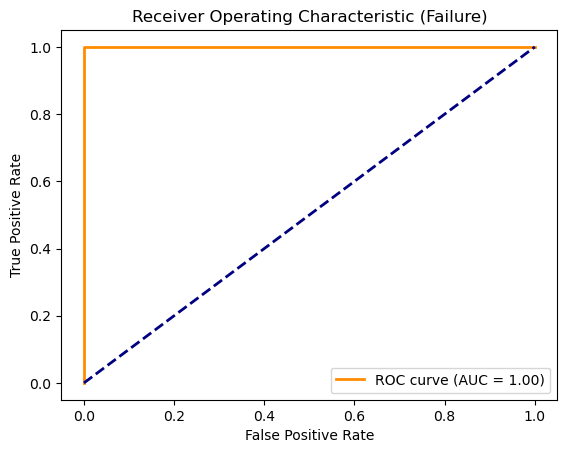

In [19]:
fpr_failure, tpr_failure, _ = roc_curve(y_failure_test, y_failure_pred)
roc_auc_failure = auc(fpr_failure, tpr_failure)
plt.figure()
plt.plot(fpr_failure, tpr_failure, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_failure)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Failure)')
plt.legend(loc="lower right")
plt.show()

In [20]:
joblib.dump(multi_target_classifier, 'failure_and_error_prediction_model.pkl')

['failure_and_error_prediction_model.pkl']

In [37]:
import pandas as pd
import numpy as np
import datetime
import joblib  # Directly import joblib
import time  # Import the time module

# Load the trained multi-output classifier model
multi_target_classifier = joblib.load('failure_and_error_prediction_model.pkl')

# Define failure thresholds (if needed)
temperature_threshold = 80
vibration_threshold = 0.6

# Function to preprocess incoming real-time sensor data
def preprocess_real_time_data(real_time_sensor_data):
    # Your preprocessing steps here
    # Ensure the data format matches the training data (e.g., handle missing values, scale features)
    return real_time_sensor_data  # Return the preprocessed data

# Path to the real-time sensor data CSV file
csv_file_path = 'real_time.csv'

# Continuously read, preprocess, and predict on real-time sensor data from the CSV file
while True:
    # Read the latest data from the CSV file
    real_time_sensor_data = pd.read_csv(csv_file_path)
    
    # Preprocess the received real-time data
    preprocessed_data = preprocess_real_time_data(real_time_sensor_data)
    
    # Extract features for prediction (exclude any irrelevant columns)
    X_real_time = preprocessed_data[['Vibration', 'Moisture', 'Temperature']]
    
    # Make predictions on the preprocessed real-time data
    y_pred = multi_target_classifier.predict(X_real_time)
    
    # Handle the predictions as needed (e.g., log or display)
    print("Predictions for real-time sensor data:")
    print("Failure Prediction:", y_pred[:, 0])  # Access failure predictions
    print("Error Prediction:", y_pred[:, 1])    # Access error predictions
    
    # Add a 10-second delay before the next iteration
    time.sleep(10)


Predictions for real-time sensor data:
Failure Prediction: [0 0 0 ... 0 0 0]
Error Prediction: [0 0 0 ... 0 0 0]
Predictions for real-time sensor data:
Failure Prediction: [0 0 0 ... 0 0 0]
Error Prediction: [0 0 0 ... 0 0 0]
Predictions for real-time sensor data:
Failure Prediction: [0 0 0 ... 0 0 0]
Error Prediction: [0 0 0 ... 0 0 0]
Predictions for real-time sensor data:
Failure Prediction: [0 0 0 ... 0 0 0]
Error Prediction: [0 0 0 ... 0 0 0]
Predictions for real-time sensor data:
Failure Prediction: [0 0 0 ... 0 0 0]
Error Prediction: [0 0 0 ... 0 0 0]
Predictions for real-time sensor data:
Failure Prediction: [0 0 0 ... 0 0 0]
Error Prediction: [0 0 0 ... 0 0 0]
Predictions for real-time sensor data:
Failure Prediction: [0 0 0 ... 1 0 0]
Error Prediction: [0 0 0 ... 2 0 0]
Predictions for real-time sensor data:
Failure Prediction: [0 0 0 ... 1 0 0]
Error Prediction: [0 0 0 ... 2 0 0]
Predictions for real-time sensor data:
Failure Prediction: [0 0 0 ... 0 0 1]
Error Prediction: [

KeyboardInterrupt: 

Failure Prediction: 0
Error Prediction: 0


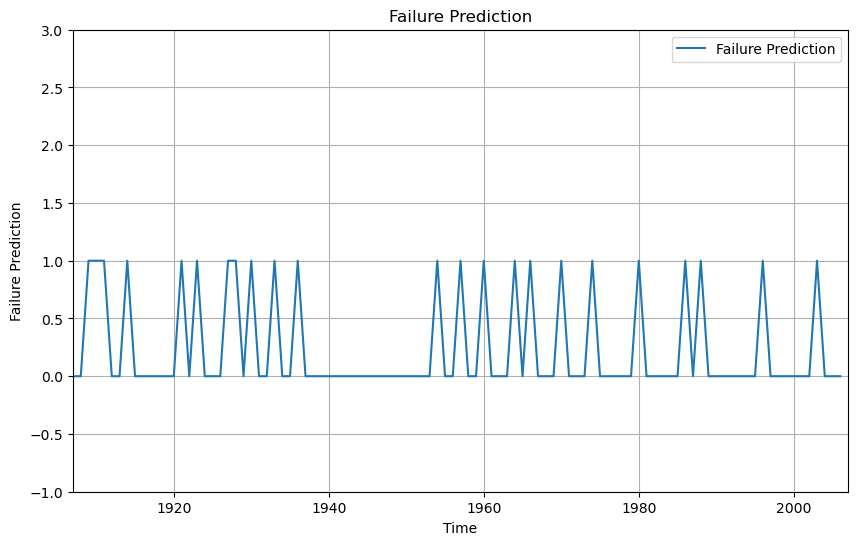

Failure Prediction: 0
Error Prediction: 0
Failure Prediction: 0
Error Prediction: 0
Failure Prediction: 0
Error Prediction: 0
Failure Prediction: 0
Error Prediction: 0
Failure Prediction: 0
Error Prediction: 0
Failure Prediction: 0
Error Prediction: 0
Failure Prediction: 0
Error Prediction: 0
Failure Prediction: 0
Error Prediction: 0
Failure Prediction: 1
Error Prediction: 2
Failure Prediction: 1
Error Prediction: 2
Failure Prediction: 0
Error Prediction: 0
Failure Prediction: 0
Error Prediction: 0
Failure Prediction: 0
Error Prediction: 0
Failure Prediction: 1
Error Prediction: 2
Failure Prediction: 0
Error Prediction: 0
Failure Prediction: 0
Error Prediction: 0
Failure Prediction: 0
Error Prediction: 0
Failure Prediction: 1
Error Prediction: 2
Failure Prediction: 0
Error Prediction: 0
Failure Prediction: 0
Error Prediction: 0
Failure Prediction: 0
Error Prediction: 0
Failure Prediction: 0
Error Prediction: 0
Failure Prediction: 0
Error Prediction: 0
Failure Prediction: 1
Error Predic

KeyboardInterrupt: 

In [41]:
import pandas as pd
import numpy as np
import datetime
import time
import joblib  # Directly import joblib
import matplotlib.pyplot as plt

# Load the trained multi-output classifier model
multi_target_classifier = joblib.load('failure_and_error_prediction_model.pkl')

# Define failure thresholds (if needed)
temperature_threshold = 80
vibration_threshold = 0.6

# Function to preprocess incoming real-time sensor data
def preprocess_real_time_data(real_time_sensor_data):
    # Your preprocessing steps here
    # Ensure the data format matches the training data (e.g., handle missing values, scale features)
    return real_time_sensor_data  # Return the preprocessed data

# Path to the real-time sensor data CSV file
csv_file_path = 'real_time.csv'

# Create plot for failure prediction
plt.figure(figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('Failure Prediction')
plt.title('Failure Prediction')
plt.grid(True)
failure_plot = plt.subplot(1, 1, 1)

# Initialize x-axis limits
x_min, x_max = 0, 100  # Initial limits, adjust as needed

# Continuously read, preprocess, and predict on real-time sensor data from the CSV file
while True:
    # Read the latest data from the CSV file
    real_time_sensor_data = pd.read_csv(csv_file_path)
    
    # Preprocess the received real-time data
    preprocessed_data = preprocess_real_time_data(real_time_sensor_data)
    
    # Extract features for prediction (exclude any irrelevant columns)
    X_real_time = preprocessed_data[['Vibration', 'Moisture', 'Temperature']]
    
    # Make predictions on the preprocessed real-time data
    y_pred = multi_target_classifier.predict(X_real_time)
    
    # Get the number of data points
    num_data_points = len(y_pred)
    
    # Update the x-axis limits dynamically based on the number of data points
    x_max = max(num_data_points, x_max)
    x_min = max(0, x_max - 100)  # Display the last 100 data points
    
    # Update the y-axis limits dynamically based on the predicted values
    y_min = min(-1, np.min(y_pred[-100:, 0]))  # Minimum value of failure prediction in the last 100 data points
    y_max = max(3, np.max(y_pred[-100:, 0]))  # Maximum value of failure prediction in the last 100 data points
    
    # Update the failure plot with new data
    failure_plot.clear()
    failure_plot.plot(range(x_min, x_max), y_pred[-100:, 0], label='Failure Prediction')
    failure_plot.set_xlim(x_min, x_max)
    failure_plot.set_ylim(y_min, y_max)  # Set y-axis limits
    failure_plot.set_xlabel('Time')
    failure_plot.set_ylabel('Failure Prediction')
    failure_plot.set_title('Failure Prediction')
    failure_plot.grid(True)
    failure_plot.legend()
    
    # Display the result of both failure and error prediction
    print("Failure Prediction:", y_pred[-1, 0])
    print("Error Prediction:", y_pred[-1, 1])
    
    # Pause to update the plot
    plt.pause(0.1)  # Adjust the pause duration as needed
    
    time.sleep(10)  # Adjust the delay as needed
